## Student Performance Indicator

## Life cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose Best Model

## 1) Problem Statement
- This project understands how the student's performance (test scores) is affected by other variables such as Genzer, Ethnicity, Parental level of education, Lunch and Test preparation course.

## 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download
- The data consists of 8 columns and 1000 rows.

## 2.1) Import Data and Required Packages
## Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('/Users/sriramdagala/Desktop/Projects/notebook/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

## 2.2 Dataset information

- gender: sex of students -> (Male/Female)
- race/ethnicity: ethnicity of students -> (Group A, B, C, D, E)
- parental level of education: Parents level of education -> (bachelor's degree, some college, master's degree, etc....)
- lunch: having lunch (standard or free/reduced)
- test preparation course: completed or not completed before test.
- math score
- reading score
- writing score

## 3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

## 3.1 Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## There are no missing values in the data set

## 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

## There are no duplicates values in the data set

## 3.3 Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## 3.5 Check Statistics of the data set

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insight
- From above description of numerical data, all means are close to each other - between 66 and 69.17;
- All standard deviations are also close - between 14.6 and 15.19
- While minimum score 0 for math, 10 for writing, 17 for reading

## 3.6 Exploring Data

In [10]:
print("Categories in 'gender' variable: ", end = " ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ", end = " ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ", end = " ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable: ", end = " ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ", end = " ")
print(df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical features: {}".format(len(numeric_features), numeric_features))
print("We have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## 3.7 Adding Columns for "Total Score" and "Average"

In [12]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [14]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


## Insights
- From above values we get students have performance the worst in Maths
- Best Performance is in reading section

## 4. Exploring Data (Visualization)

## 4.1 Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

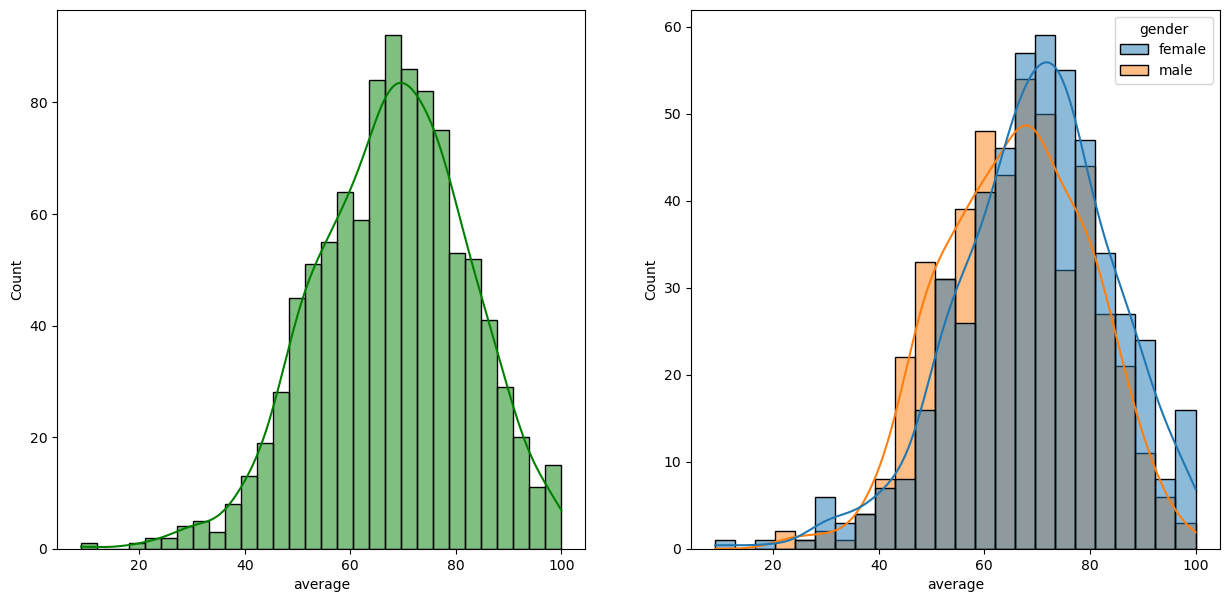

In [15]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = 'average', bins = 30, kde = True, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'average', kde = True, hue = 'gender')
plt.show()

## Insights
- Female students scored well in the exams than male students

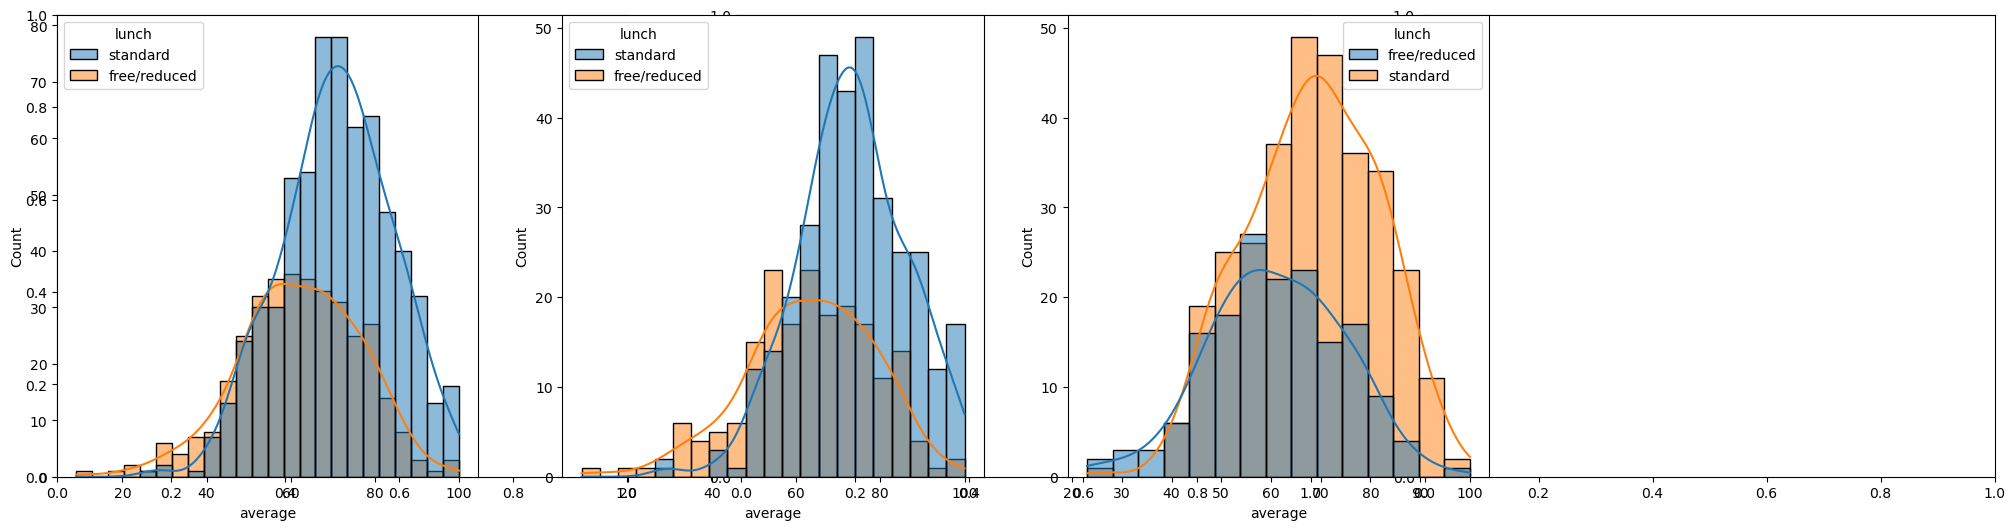

In [16]:
# Avg with Lunch
fig, axs = plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'lunch')
plt.show()

## Insights
- Students having standard lunch has better average.
- Students having standard lunch has better average in Female and Male Students.

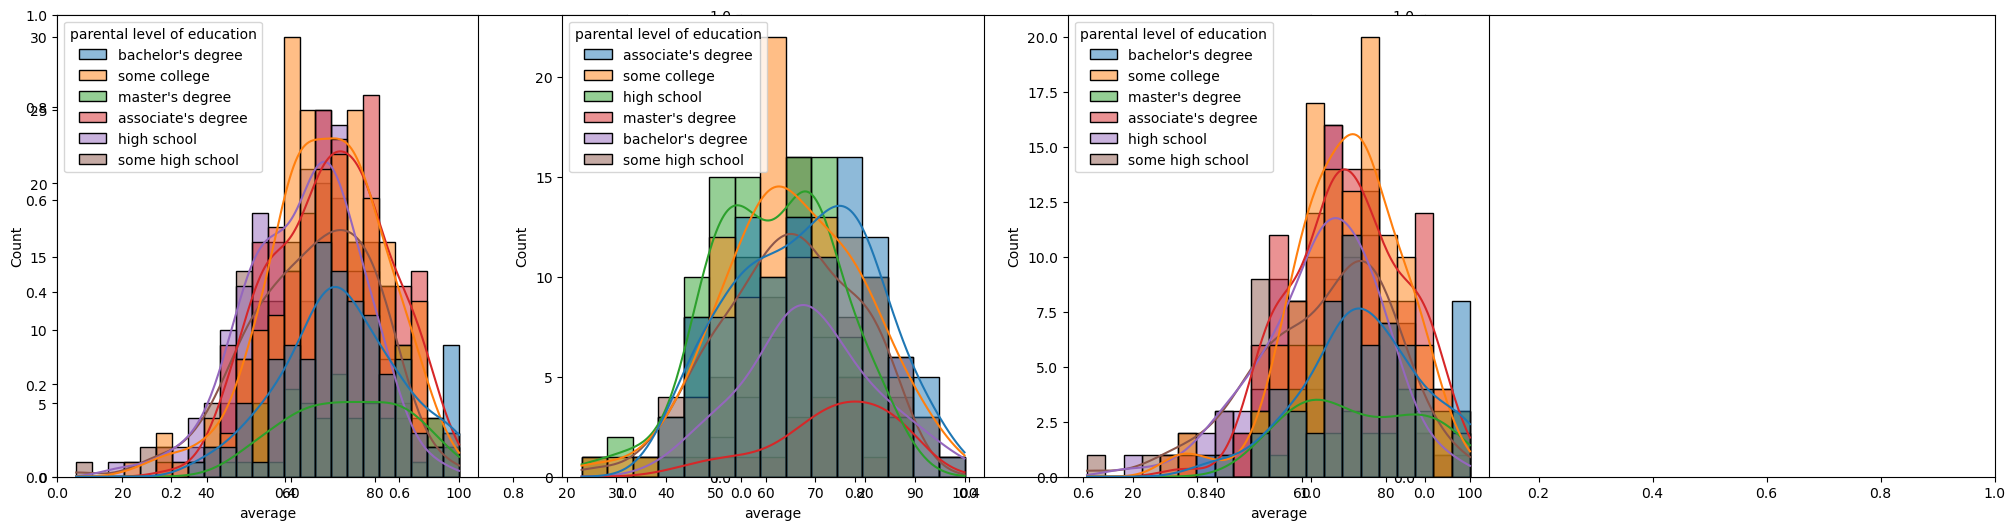

In [17]:
fig, axs = plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'parental level of education')
plt.show()

## Insights
- In general parent's education don't help students to perform well in the exam.
- 2nd plot shows that parents whose education is of associate degree thier male children performed well in the exams.
- 3rd plot we can see there is no effect of parent's education on female students.


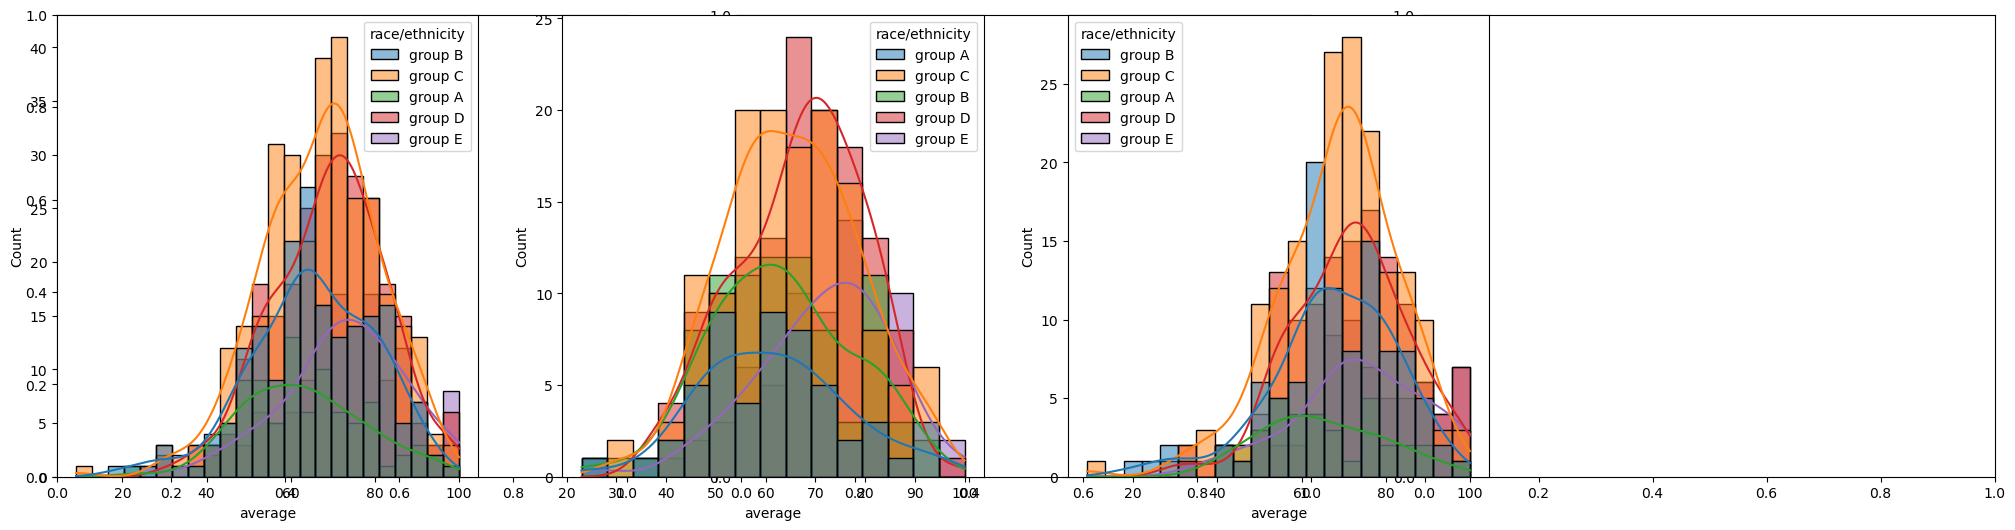

In [18]:
fig, axs = plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde = True, hue = 'race/ethnicity')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'race/ethnicity')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'race/ethnicity')
plt.show()

## Insights
- Group A and Group B tends to perform poorly in exam
- Group A and Group B tends to perform poorly in exam irrespective of whether they are male or female

## 4.2 Maximum score of students in all three subjects

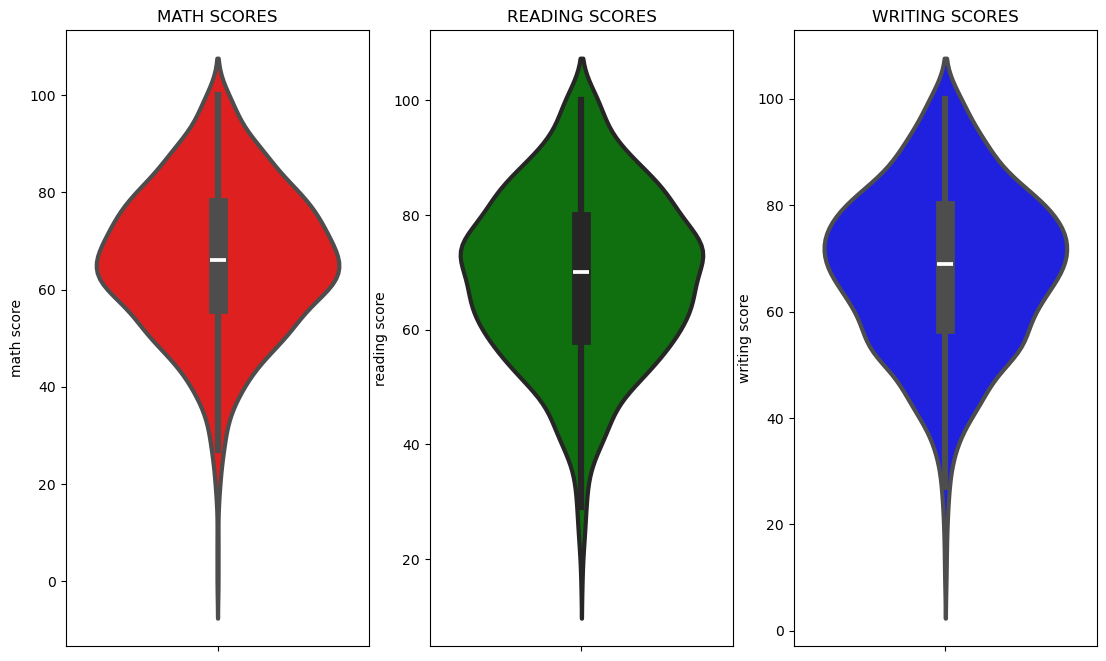

In [19]:
plt.figure(figsize = (18, 8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y = 'math score', data = df, color = 'red', linewidth = 3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y = 'reading score', data = df, color = 'green', linewidth = 3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y = 'writing score', data = df, color = 'blue', linewidth = 3)
plt.show()

## Insights
- From the above three plots its clearly visible that most of the students score between 60-80 in Maths, Readings and Writings.

## Multivariate analysis using pieplot

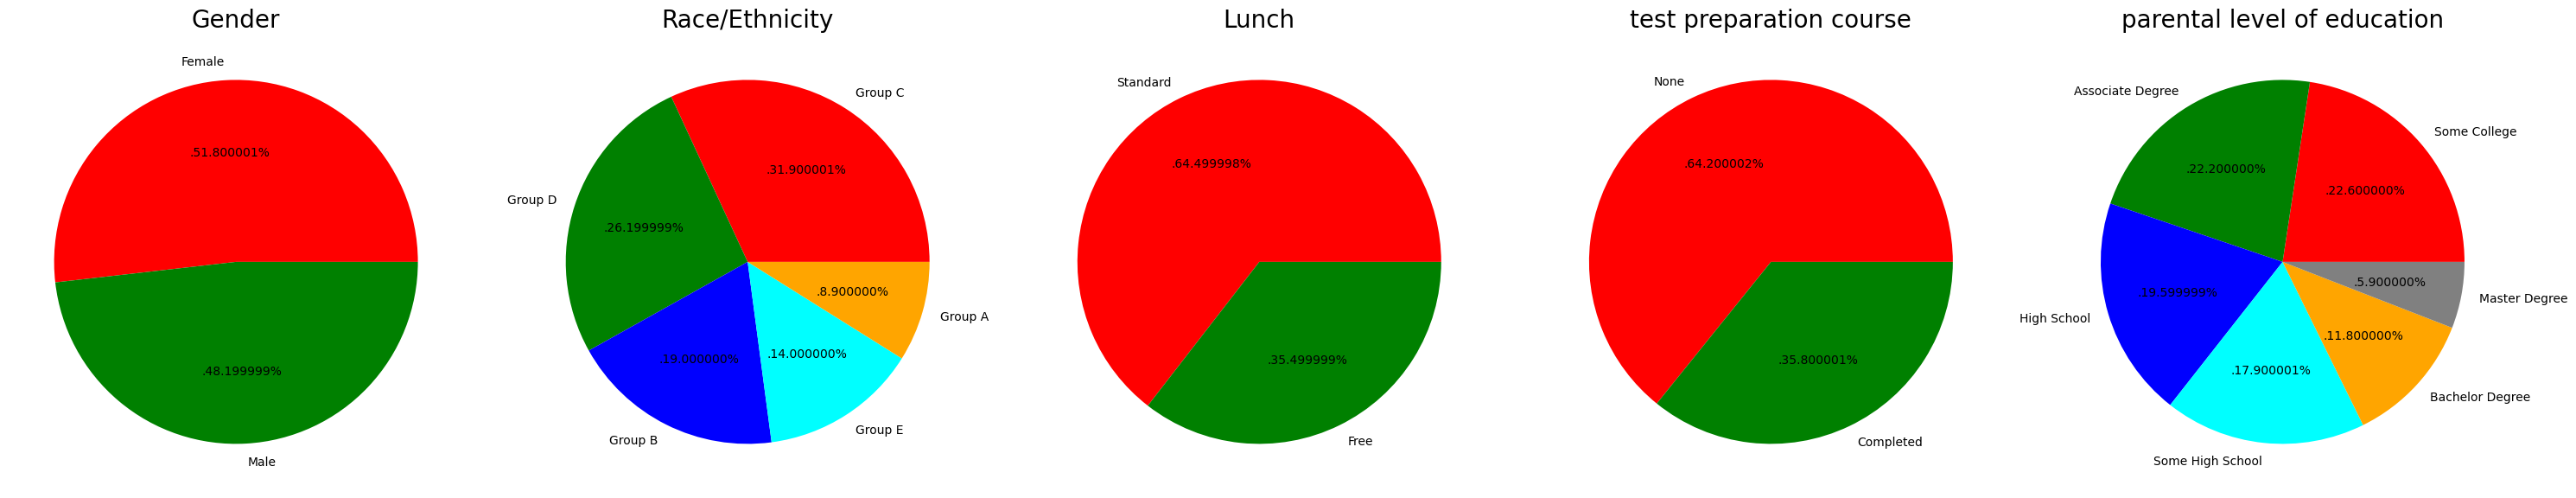

In [20]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('test preparation course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', 'Associate Degree', 'High School', 'Some High School', 'Bachelor Degree', 'Master Degree'
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('parental level of education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

## Insights
- Number of Male and Female students are almost equal.
- Number of students are greatest in Group C of Race.
- Number of students are greatest in standard Lunch.
- Max number of students didn't prepare for the course.
- Most of the parents have Associate Degree and Attended some college.

## Checking Outlier's

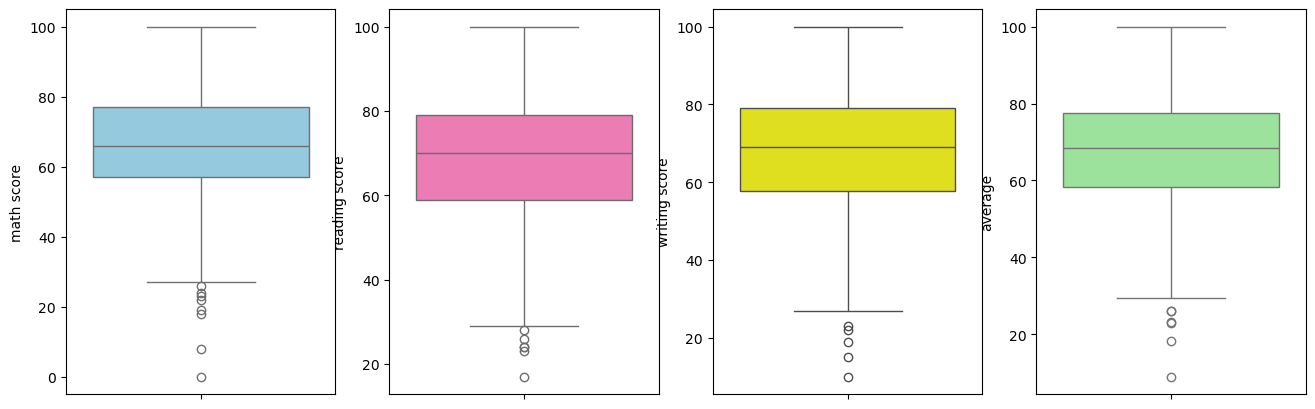

In [21]:
plt.subplots(1, 4, figsize = (16, 5))
plt.subplot(141)
sns.boxplot(df['math score'], color = 'skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'], color = 'hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'], color = 'yellow')
plt.subplot(144)
sns.boxplot(df['average'], color = 'lightgreen')
plt.show()